# SIMPLE LINEAR REGRESSION

## QUESTION -1 :- Delivery Time Problem

### Statement :- Delivery_time -> Predict delivery time using sorting time.

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## ------------------------------------------------------------------------------------------------------------------------------------

## 1. Importing Libraries :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset :

In [3]:
delivery_time_dataset = pd.read_csv('delivery_time.csv',sep=',')
delivery_time_dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Data Understanding :

#### 3.1 Initial Analysis :

In [4]:
delivery_time_dataset.shape

(21, 2)

In [5]:
delivery_time_dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery_time_dataset.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#### 3.2 Data Preparation :

In [7]:
#change the column names for our convenience in data modelling

delivery_time_dataset.columns=['delivery_time','sorting_time']
delivery_time_dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### 3.3 Assumptions check :

#####  I. Test for linearity :

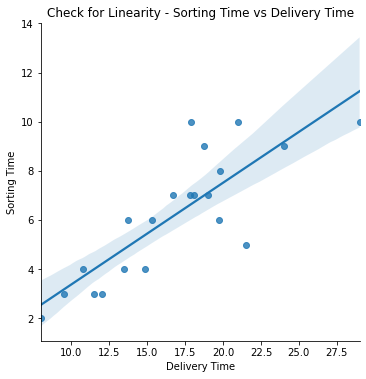

In [8]:
sns.lmplot(x = 'delivery_time', y = 'sorting_time', data = delivery_time_dataset)
plt.title('Check for Linearity - Sorting Time vs Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

##### OBSERVATION :- 

Linearity test **"FAILED"**.

##### II. Test for Normality

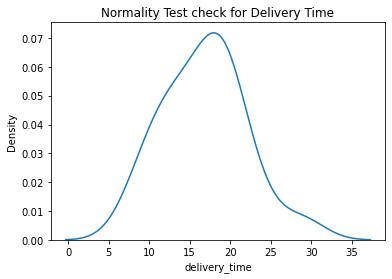

In [9]:
sns.distplot(a = delivery_time_dataset['delivery_time'],hist = False)
plt.title('Normality Test check for Delivery Time')
plt.show()

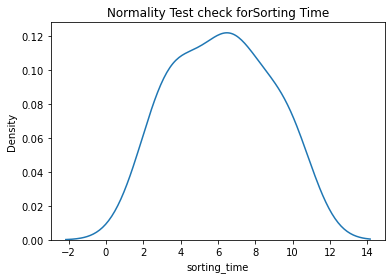

In [10]:
sns.distplot(a = delivery_time_dataset['sorting_time'],hist = False)
plt.title('Normality Test check forSorting Time')
plt.show()

##### OBSERVATION :-

Normality Test **"FAILED".**

##### III. Multi-collinearity test 

In [9]:
delivery_time_correlation_matrix = delivery_time_dataset.corr()
delivery_time_correlation_matrix

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


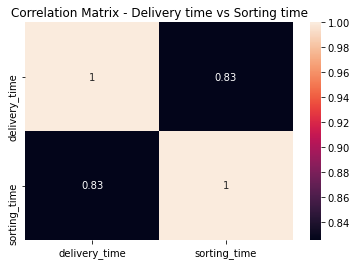

In [10]:
sns.heatmap(delivery_time_correlation_matrix,annot=True)
plt.title('Correlation Matrix - Delivery time vs Sorting time')
plt.show()

##### OBSERVATION :-

Multicollinearity test **"FAILED"**.

##### IV. Auto-Regression 

###### OBSERVATION :- Test is "PASSED" as no time frame data.

##### V. Homoscadascity check || VI. Zero Residual Mean check

###### OBSERVATION :- These checks can be performed after "Post Model Training".

### 4. Model Building :

####  Using statsmodel library


In [11]:
import statsmodels.formula.api as smf
delivery_time_linear_model = smf.ols(formula = 'delivery_time ~ sorting_time',data = delivery_time_dataset).fit()
delivery_time_linear_model

### 5. Model Testing :

In [12]:
delivery_time_linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
delivery_time_linear_model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [14]:
delivery_time_linear_model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

### 6. Model Training :

#### 6.1 Manual calculation :

In [15]:
#eauation is : y = mx + c

# from above testing results : c (intercept) = 6.582734 and m (slope) = 1.649020

# if x = 17 then y = ?
x = 17
# from equation above y can be computed :
y_1 = 1.649020 * x + 6.582734
y_1

34.616074

In [16]:
#eauation is : y = mx + c

# from above testing results : c (intercept) = 6.582734 and m (slope) = 1.649020

# if x = 13 then y = ?
x = 13
# from equation above y can be computed :
y_2 = 1.649020 * x + 6.582734
y_2

28.019993999999997

#### 6.2 Machine Calculation

In [17]:
# A new random data is created for the calculation of the machine and is imported.

delivery_time_new_data = pd.read_csv('delivery_new_data.csv',sep=',')
delivery_time_new_data

,sorting_time
0,13
1,18
2,28
3,24
4,17
5,26
6,20
7,29
8,12
9,17


In [18]:
predict_delivery_time = delivery_time_linear_model.predict(delivery_time_new_data)
predict_delivery_time = pd.DataFrame(predict_delivery_time)
predict_delivery_time

,0
0,28.019993
1,36.265092
2,52.755291
3,46.159211
4,34.616072
5,49.457251
6,39.563132
7,54.404311
8,26.370973
9,34.616072


### 7. Model Evaluation :

In [19]:
delivery_time_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        21:03:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print('R2 Score             :',delivery_time_linear_model.rsquared)
print('R2 adjusted Score    :',delivery_time_linear_model.rsquared_adj)
print('AIC                  :',delivery_time_linear_model.aic)
print('BIC                  :',delivery_time_linear_model.bic)

R2 Score             : 0.6822714748417231
R2 adjusted Score    : 0.6655489208860244
AIC                  : 106.71400170798609
BIC                  : 108.80304658343293


### 8. Model Deployement :

In [21]:
from pickle import dump

In [22]:
dump(delivery_time_linear_model,open('delivery_time.pkl','wb'))

In [23]:
from pickle import load

In [24]:
loaded_delivery_file = load(open('delivery_time.pkl','rb'))

In [25]:
loaded_delivery_file

In [26]:
loaded_delivery_file.predict(delivery_time_new_data)

0    28.019993
1    36.265092
2    52.755291
3    46.159211
4    34.616072
5    49.457251
6    39.563132
7    54.404311
8    26.370973
9    34.616072
dtype: float64

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
delivery_time_dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [28]:
X = delivery_time_dataset.drop(labels='delivery_time',axis=1)
y = delivery_time_dataset[['delivery_time']]

In [29]:
X

,sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [30]:
y

,delivery_time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [31]:
X.mean()

sorting_time    6.190476
dtype: float64

In [32]:
X.std()

sorting_time    2.542028
dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X= std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=['sorting_time'])
scaled_X

,sorting_time
0,1.535625
1,-0.882984
2,-0.076781
3,1.132523
4,1.535625
5,-0.076781
6,0.326320
7,-1.286086
8,1.535625
9,1.132523


In [34]:
scaled_X.mean()

sorting_time   -7.137148e-17
dtype: float64

In [35]:
scaled_X.std()

sorting_time    1.024695
dtype: float64

### Model Training

In [36]:
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression()
linear_model_1.fit(scaled_X,y)

LinearRegression()

### Model testing

In [37]:
delivery_predict = linear_model_1.predict(scaled_X)
delivery_predict

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

### Model Evaluation

In [38]:
error = y-delivery_predict
error

,delivery_time
0,-2.072933
1,0.321186
2,3.273147
3,2.576087
4,5.927067
5,-1.126853
6,0.874127
7,-2.029794
8,-5.172933
9,-2.673913


### Now check the assumption 5 : Homoscadascity check

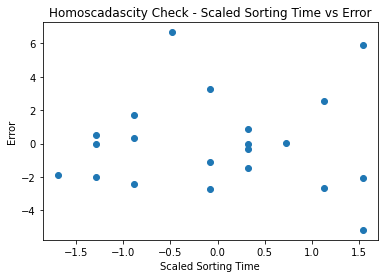

In [39]:
plt.scatter(x=scaled_X['sorting_time'],y=error)
plt.title('Homoscadascity Check - Scaled Sorting Time vs Error')
plt.xlabel('Scaled Sorting Time')
plt.ylabel('Error')
plt.show()

#### OBSERVATION :- 

Homoscadascity check **FAILED**.

### Now check for Zero residual mean error

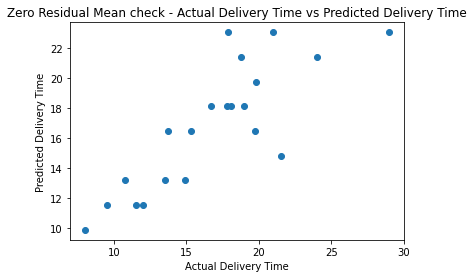

In [40]:
plt.scatter(x=y, y=delivery_predict)
plt.title('Zero Residual Mean check - Actual Delivery Time vs Predicted Delivery Time')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()

#### OBSERVATION :- 
Zero Residual mean check **"FAILED".**